# Lecture 11: Thyroid Example

In [100]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [101]:
# load imports

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as pit


In [102]:
# load dataset

thyroid_df = pd.read_csv('thyroid_data.csv')

# look at the shape of data (rows, columns)
thyroid_df.shape


(383, 17)

In [103]:
# look at dataframe
thyroid_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [104]:
# look at data on recurrence
thyroid_df['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

In [105]:
# define list of column name to one hot encode

cols_to_exclude = ['Age', 'Recurred']
categorical_cols = [col for col in thyroid_df.columns if col not in cols_to_exclude]

categorical_cols

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

In [106]:
# define the one hot encoding plan format

column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

In [107]:
# apply the transformer
transformed_data = column_transformer.fit_transform(thyroid_df)

transformed_data

array([[1.0, 0.0, 1.0, ..., 0.0, 27, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 34, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 30, 'No'],
       ...,
       [0.0, 1.0, 0.0, ..., 1.0, 72, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 61, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 67, 'Yes']],
      shape=(383, 56), dtype=object)

In [108]:
pd.DataFrame(transformed_data).head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No


In [109]:
# get a list of column names 
encoded_cols = column_transformer.named_transformers_['encoder'].get_feature_names_out(categorical_cols)
encoded_cols

array(['Gender_F', 'Gender_M', 'Smoking_No', 'Smoking_Yes',
       'Hx Smoking_No', 'Hx Smoking_Yes', 'Hx Radiothreapy_No',
       'Hx Radiothreapy_Yes', 'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right',
       'Pathology_Follicular', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary',
       'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High',
       'Risk_Intermediate', '

In [110]:
# convert to a list
encoded_cols = list (encoded_cols)

#add the age and recurred column names

encoded_cols.append('Age')
encoded_cols.append('Recurred')

In [111]:
# convert transformed data to a dataframe
transformed_df = pd.DataFrame(transformed_data, columns=encoded_cols)

transformed_df 

,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,...,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Age,Recurred
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,72,Yes
379,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,81,Yes
380,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,72,Yes
381,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61,Yes


In [112]:
transformed_df.shape


(383, 56)

In [113]:
# rename target row to 'Recurred'
transformed_df = transformed_df.rename(columns={55: 'Recurred'})

In [114]:
# make the X and y variables

X = transformed_df.drop('Recurred', axis = 1)

y = transformed_df['Recurred']

X.shape, y.shape

((383, 55), (383,))

In [115]:
# do the train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

In [116]:
X_train.shape

(283, 55)

In [117]:
# define the parameter grid

param_grid = {
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 8],
    'max_features': ['sqrt'],
    'n_estimators': [30, 60, 90]
}

In [118]:
# make the random forest classifier
rf_classifier = RandomForestClassifier()

# make the grid search object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=2, scoring= 'accuracy')

In [119]:
# run the grid search
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_params

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 60}

In [120]:
best_score = grid_search.best_score_

best_score

np.float64(0.9575716711617221)

In [121]:
# define a model with best parameters
final_model = RandomForestClassifier(
    class_weight='balanced',
    criterion='gini',
    max_depth=4,
    max_features='sqrt',
    n_estimators=90
)

final_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=90)

In [122]:
# get model score
final_model.score(X_test, y_test)

0.93

In [123]:
# get feature importance

feature_importances = final_model.feature_importances_

feature_importances

array([5.07485750e-03, 9.49130327e-03, 5.79155698e-03, 4.67168131e-03,
       1.55547221e-03, 1.74037258e-03, 1.00188151e-04, 7.61643400e-04,
       5.84656310e-04, 5.44041408e-04, 2.77685711e-03, 0.00000000e+00,
       1.85053059e-03, 8.68593758e-07, 1.08803027e-03, 1.29881147e-04,
       3.32177349e-03, 2.33740996e-03, 4.46866956e-03, 6.05272130e-05,
       1.77214730e-03, 8.39585124e-02, 0.00000000e+00, 3.53474805e-03,
       2.88064935e-03, 2.73421580e-03, 5.73018353e-04, 9.00337627e-04,
       2.24801517e-02, 1.81464593e-02, 2.13679177e-02, 2.97543903e-02,
       1.71243385e-01, 6.56264118e-04, 6.65785235e-04, 2.20767730e-02,
       6.70016836e-03, 5.57520964e-03, 7.79087658e-03, 3.84011307e-04,
       6.94578295e-02, 5.45631568e-03, 6.13054517e-02, 2.83023546e-03,
       1.92001226e-03, 1.02148349e-02, 7.23842564e-03, 0.00000000e+00,
       5.70007671e-04, 3.78857920e-04, 5.50015416e-03, 1.43956204e-01,
       2.36275378e-02, 1.93289560e-01, 2.47092310e-02])

In [126]:
# convert to dataframe  
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

# sort the dataframe
feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)

feature_importance_df

,feature,importance
53,Response_Structural Incomplete,1.932896e-01
32,Risk_Low,1.712434e-01
51,Response_Excellent,1.439562e-01
21,Adenopathy_No,8.395851e-02
40,N_N0,6.945783e-02
42,N_N1b,6.130545e-02
31,Risk_Intermediate,2.975439e-02
54,Age,2.470923e-02
52,Response_Indeterminate,2.362754e-02
28,Focality_Multi-Focal,2.248015e-02


<Axes: xlabel='feature'>

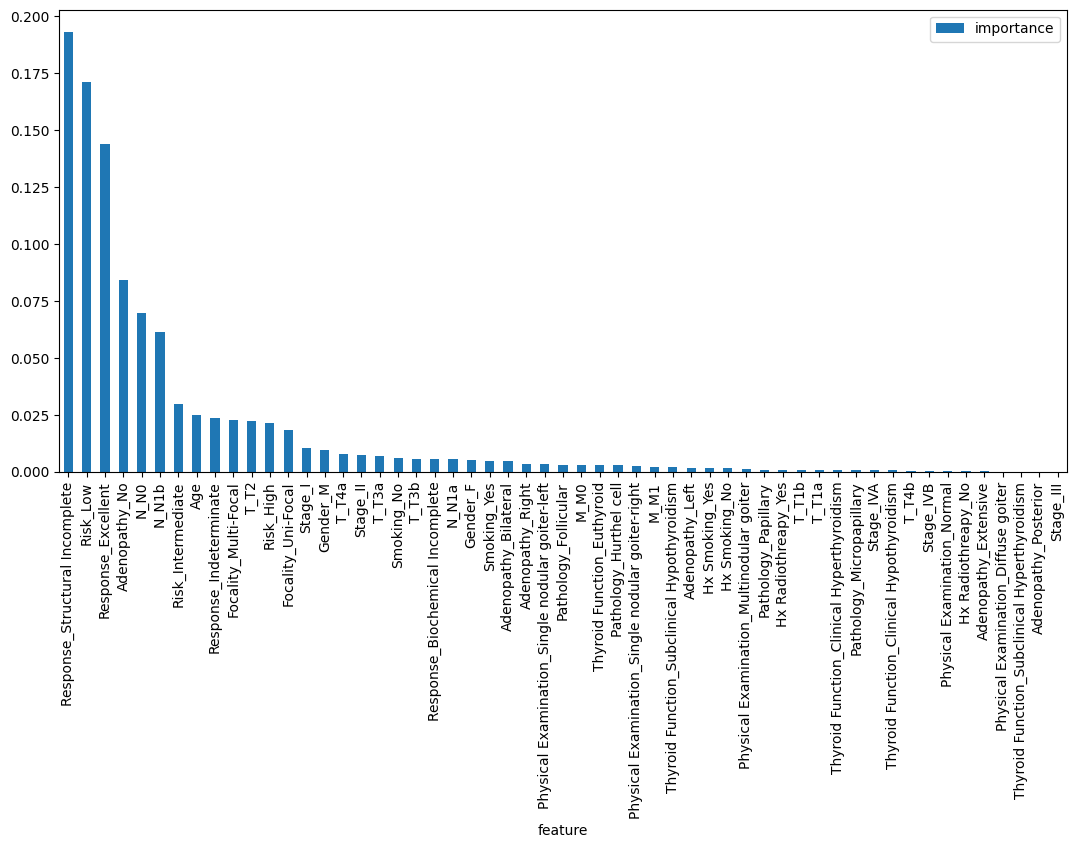

In [127]:
# plot the feature importance
feature_importance_df.plot.bar(x='feature', y='importance', figsize=(13, 6))